In [129]:

import pandas as pd
import gzip
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [130]:
filename="reviews_Office_Products_5.json.gz"
path=os.path.join(os.getcwd(), filename)

In [131]:
def parse(path):
    with gzip.open(path, 'rb') as f:
        for line in f:
            yield json.loads(line)

def getDF(path):
    try:
        df = {i: d for i, d in enumerate(parse(path))}
        return pd.DataFrame.from_dict(df, orient='index')
    except FileNotFoundError:
        print(f"Error: File '{path}' not found.")
    except Exception as e:
        print(f"Error: {e}")


In [132]:
df = getDF(path)

In [133]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A32T2H8150OJLU,B00000JBLH,ARH,"[3, 4]","I bought my first HP12C in about 1984 or so, a...",5.0,"A solid performer, and long time friend",1094169600,"09 3, 2004"
1,A3MAFS04ZABRGO,B00000JBLH,"Let it Be ""Alan""","[7, 9]",WHY THIS BELATED REVIEW? I feel very obliged t...,5.0,"Price of GOLD is up, so don't bury the golden ...",1197676800,"12 15, 2007"
2,A1F1A0QQP2XVH5,B00000JBLH,Mark B,"[3, 3]",I have an HP 48GX that has been kicking for mo...,2.0,"Good functionality, but not durable like old HPs",1293840000,"01 1, 2011"
3,A49R5DBXXQDE5,B00000JBLH,R. D Johnson,"[7, 8]",I've started doing more finance stuff recently...,5.0,One of the last of an almost extinct species,1145404800,"04 19, 2006"
4,A2XRMQA6PJ5ZJ8,B00000JBLH,Roger J. Buffington,"[0, 0]",For simple calculations and discounted cash fl...,5.0,Still the best,1375574400,"08 4, 2013"


In [134]:
# make a new column concatenating the summary and the review text
df['reviewTextSummary'] = df['summary'] + ' ' + df['reviewText']

In [135]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewTextSummary
0,A32T2H8150OJLU,B00000JBLH,ARH,"[3, 4]","I bought my first HP12C in about 1984 or so, a...",5.0,"A solid performer, and long time friend",1094169600,"09 3, 2004","A solid performer, and long time friend I boug..."
1,A3MAFS04ZABRGO,B00000JBLH,"Let it Be ""Alan""","[7, 9]",WHY THIS BELATED REVIEW? I feel very obliged t...,5.0,"Price of GOLD is up, so don't bury the golden ...",1197676800,"12 15, 2007","Price of GOLD is up, so don't bury the golden ..."
2,A1F1A0QQP2XVH5,B00000JBLH,Mark B,"[3, 3]",I have an HP 48GX that has been kicking for mo...,2.0,"Good functionality, but not durable like old HPs",1293840000,"01 1, 2011","Good functionality, but not durable like old H..."
3,A49R5DBXXQDE5,B00000JBLH,R. D Johnson,"[7, 8]",I've started doing more finance stuff recently...,5.0,One of the last of an almost extinct species,1145404800,"04 19, 2006",One of the last of an almost extinct species I...
4,A2XRMQA6PJ5ZJ8,B00000JBLH,Roger J. Buffington,"[0, 0]",For simple calculations and discounted cash fl...,5.0,Still the best,1375574400,"08 4, 2013",Still the best For simple calculations and dis...


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53258 entries, 0 to 53257
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviewerID         53258 non-null  object 
 1   asin               53258 non-null  object 
 2   reviewerName       52799 non-null  object 
 3   helpful            53258 non-null  object 
 4   reviewText         53258 non-null  object 
 5   overall            53258 non-null  float64
 6   summary            53258 non-null  object 
 7   unixReviewTime     53258 non-null  int64  
 8   reviewTime         53258 non-null  object 
 9   reviewTextSummary  53258 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.5+ MB


In [137]:
# check for null values
df.isnull().sum()

reviewerID             0
asin                   0
reviewerName         459
helpful                0
reviewText             0
overall                0
summary                0
unixReviewTime         0
reviewTime             0
reviewTextSummary      0
dtype: int64

In [138]:
# since we are concerned with sentiment analysis, we do not need to drop the null values

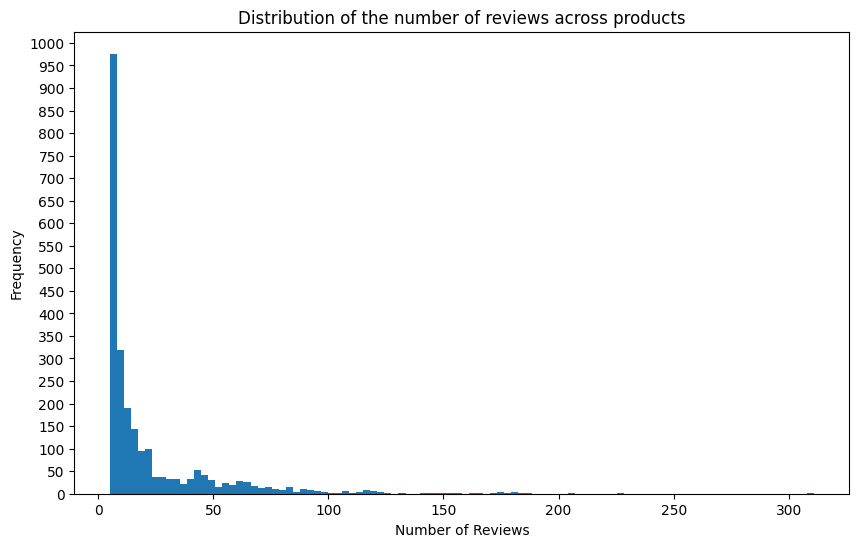

In [139]:
# Distribution of the number of reviews across products
plt.figure(figsize=(10,6))
plt.hist(df.groupby('asin')['reviewText'].count().sort_values(ascending=False), bins=100)
plt.title('Distribution of the number of reviews across products')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 1050, 50))
plt.show()

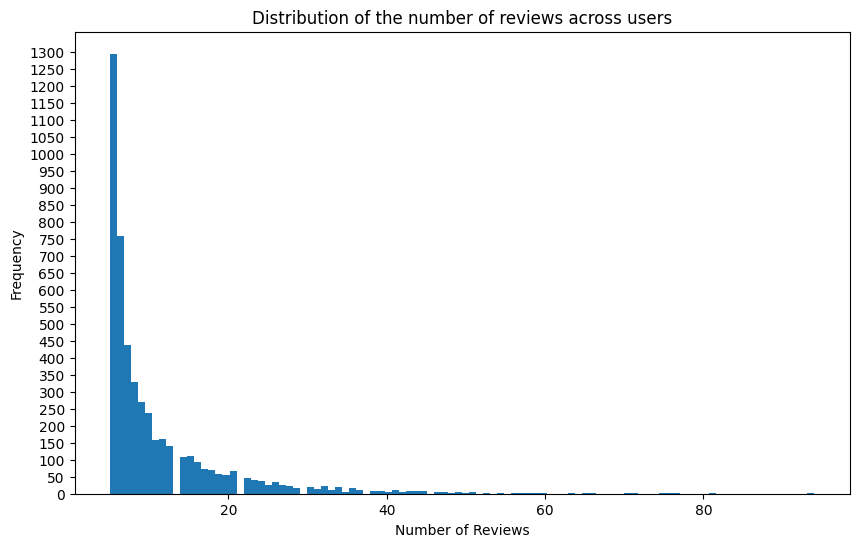

In [140]:
# distribution of the number of reviews across users
plt.figure(figsize=(10,6))
plt.hist(df.groupby('reviewerID')['reviewText'].count().sort_values(ascending=False), bins=100)
plt.title('Distribution of the number of reviews across users')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 1350, 50))
plt.show()


In [141]:
# get review per item using groupby
reviews_per_item = df.groupby('asin')['reviewText'].count().sort_values(ascending=False)

In [142]:
reviews_per_item = pd.DataFrame(reviews_per_item)
reviews_per_item

,reviewText
asin,
B0010T3QT2,311
B0039N7ELS,227
B0027CTFBO,205
B0039N3QFQ,186
B000MFHX3U,185
...,...
B000F2PFJ4,5
B000F3YSQ4,5
B000F7IU7S,5


In [143]:
# average rating per office product using groupby
avg_rating_per_item = df.groupby('asin')['overall'].mean().sort_values(ascending=False)

In [144]:
avg_rating_per_item = pd.DataFrame(avg_rating_per_item)

In [145]:
avg_rating_per_item.head()

,overall
asin,
B002I47P40,5.0
B0015YCRZG,5.0
B000FNPNO0,5.0
B009FFXVQQ,5.0
B000FRZ620,5.0


In [146]:
# concatenate the two dataframes
reviews_ratings_per_item=pd.concat([reviews_per_item, avg_rating_per_item], axis=1)

In [147]:
reviews_ratings_per_item.shape

(2420, 2)

In [148]:
reviews_ratings_per_item.head()

,reviewText,overall
asin,,
B0010T3QT2,311,4.218650
B0039N7ELS,227,4.533040
B0027CTFBO,205,4.624390
B0039N3QFQ,186,3.994624
B000MFHX3U,185,4.324324


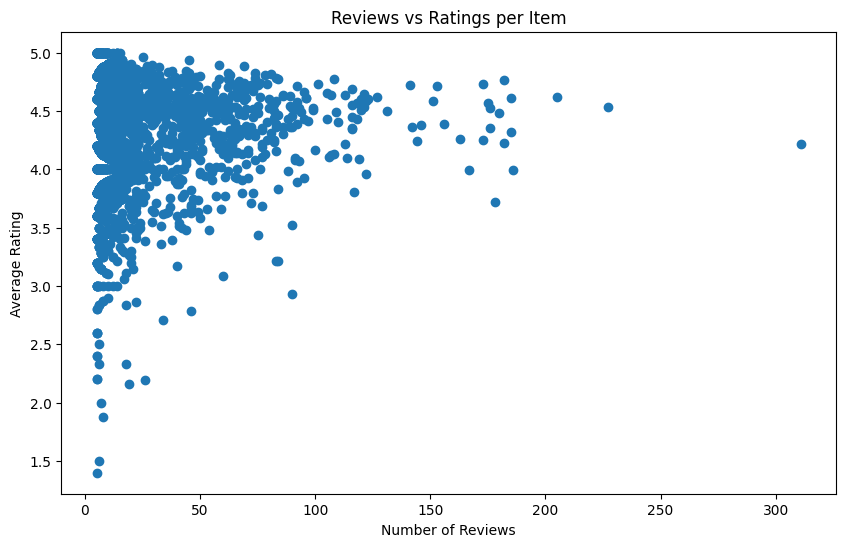

In [149]:
# plot reviews_ratings_per_item
plt.figure(figsize=(10,6))
plt.scatter(reviews_ratings_per_item.reviewText, reviews_ratings_per_item.overall)
plt.title('Reviews vs Ratings per Item')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.show()

In [150]:
# for this data no of reviews does not seem to have a correlation with the average rating
# correlation between the number of reviews and the average rating
relation1 = reviews_ratings_per_item.corr()
relation1

,reviewText,overall
reviewText,1.000000,0.011635
overall,0.011635,1.000000


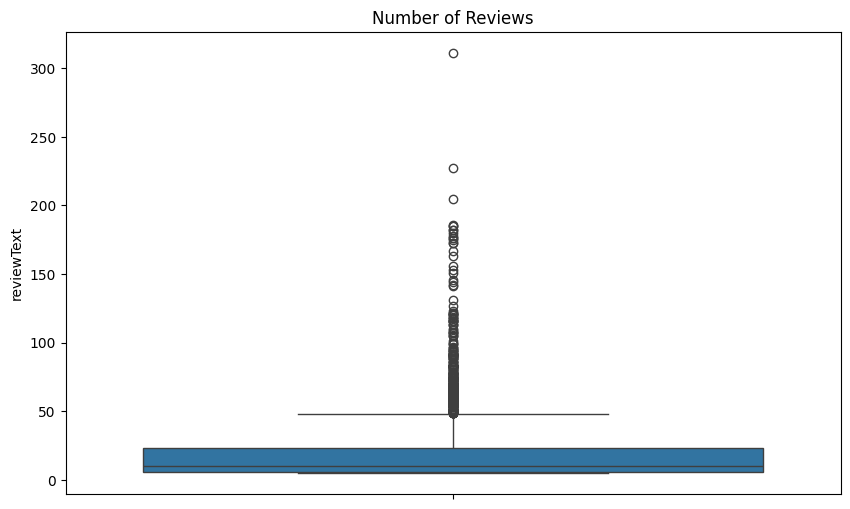

In [151]:
# check for outliers in the number of reviews
plt.figure(figsize=(10,6))
sns.boxplot(reviews_ratings_per_item.reviewText)
plt.title('Number of Reviews')
plt.show()

In [152]:

# For each of your dataframe column, you could get quantile with:
q = df["reviewTextSummary"].str.len().quantile(0.90)
q


1678.0

In [153]:
df = df[df["reviewTextSummary"].str.len() < q]

In [154]:
df.shape

(47928, 10)

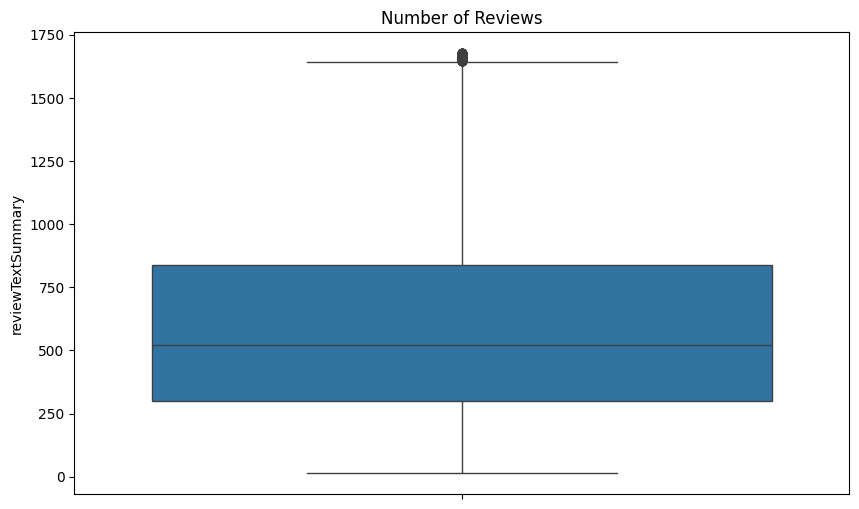

In [155]:
# check for outliers in the number of reviews
plt.figure(figsize=(10,6))
sns.boxplot(df.reviewTextSummary.str.len())
plt.title('Number of Reviews')
plt.show()

In [156]:
#reviews per user using groupby
reviews_per_user = df.groupby('reviewerID')['reviewText'].count().sort_values(ascending=False)

In [157]:
reviews_per_user = pd.DataFrame(reviews_per_user)

In [158]:
reviews_per_user.head()

,reviewText
reviewerID,
A3OXHLG6DIBRW8,90
A3UW0PQLDUACMH,74
A1Z16630QMH8Q6,74
A26LQSC65AMTGK,71
A1ODOGXEYECQQ8,68


In [159]:
# average rating per user using groupby
avg_rating_per_user = df.groupby('reviewerID')['overall'].mean().sort_values(ascending=False)

In [160]:
avg_rating_per_user = pd.DataFrame(avg_rating_per_user)

In [161]:
avg_rating_per_user.head()

,overall
reviewerID,
A1GE53W7QT1RGE,5.0
A30YDYGEAUEA73,5.0
A32CQ23727FKOI,5.0
A320NYVVIZSZGY,5.0
A320BTSBIAO9AM,5.0


In [162]:
# concatenate the two dataframes
reviews_ratings_per_user=pd.concat([reviews_per_user, avg_rating_per_user], axis=1)


In [163]:
reviews_ratings_per_user.shape

(4893, 2)

In [164]:
reviews_ratings_per_user.head()

,reviewText,overall
reviewerID,,
A3OXHLG6DIBRW8,90,4.366667
A3UW0PQLDUACMH,74,4.972973
A1Z16630QMH8Q6,74,4.972973
A26LQSC65AMTGK,71,4.436620
A1ODOGXEYECQQ8,68,4.338235


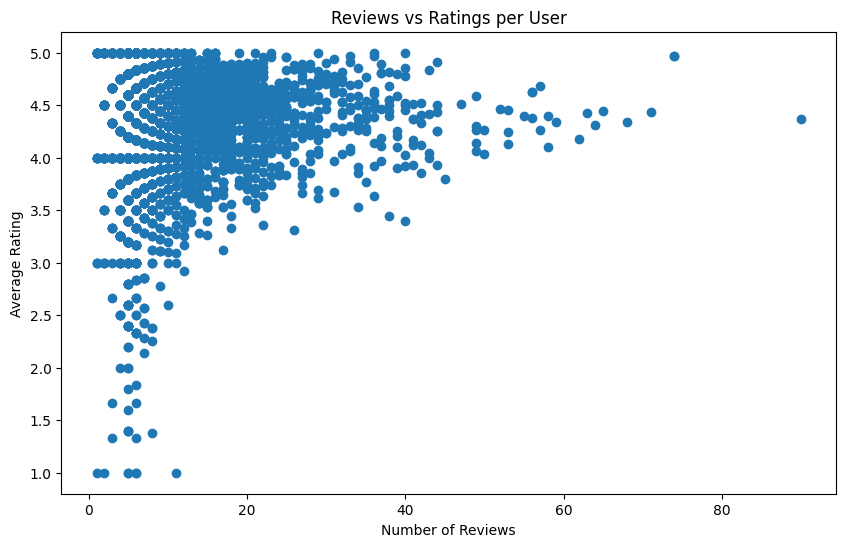

In [165]:
# plot a graph or user reviews vs average rating
plt.figure(figsize=(10,6))
plt.scatter(reviews_ratings_per_user['reviewText'], reviews_ratings_per_user['overall'])
# color t
plt.title('Reviews vs Ratings per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.show()

In [166]:
# for this data no of reviews does not seem to have a correlation with the average rating
# correlation between the number of reviews and the average rating
relation2 = reviews_ratings_per_user.corr()
relation2

,reviewText,overall
reviewText,1.000000,0.017614
overall,0.017614,1.000000


In [167]:
# check for outliers in the 

In [168]:
q = df["reviewTextSummary"].str.len().quantile(0.90)

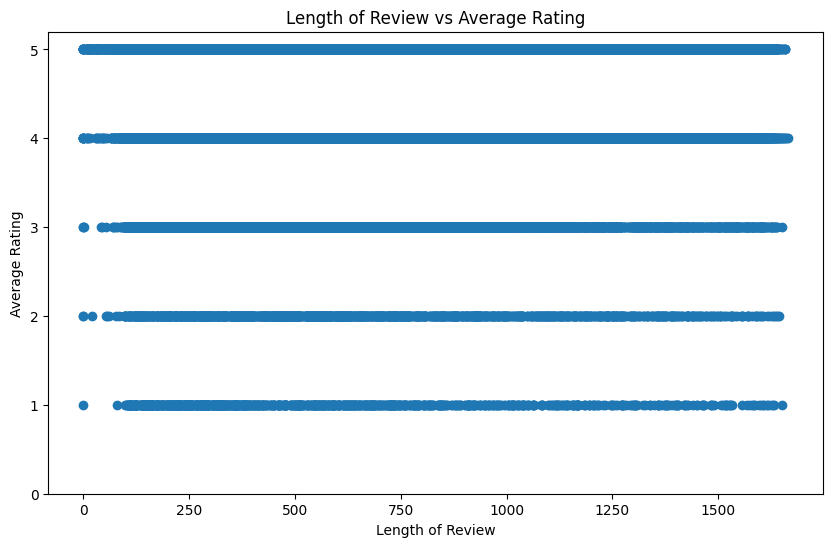

In [169]:
# plot length of review vs rating
plt.figure(figsize=(10,6))
plt.scatter(df['reviewText'].str.len(), df['overall'])
plt.title('Length of Review vs Average Rating')
plt.xlabel('Length of Review')
plt.ylabel('Average Rating')
plt.yticks(np.arange(0, 6, 1))
plt.show()

In [170]:
# correlation between the length of review and the average rating
relation3 = df['reviewText'].str.len().corr(df['overall'])


In [171]:
relation3
# weak relatio

-0.13310089994400512

In [172]:
#max and mean reviews per item and user
max_review_per_user=reviews_per_user[reviews_per_user['reviewText']==reviews_per_user['reviewText'].max()]
max_review_per_item=reviews_per_item[reviews_per_item['reviewText']==reviews_per_item['reviewText'].max()]
mean_review_per_item=reviews_per_item['reviewText'].mean()
mean_review_per_user=reviews_per_user['reviewText'].mean()

print('Maximum number of reviews per user: \n', max_review_per_user, '\n')
print('Maximum number of reviews per item: \n', max_review_per_item, '\n')
print('Mean number of reviews per user: \n', mean_review_per_user, '\n')
print('Mean number of reviews per item: \n', mean_review_per_item, '\n')

Maximum number of reviews per user: 
                 reviewText
reviewerID                
A3OXHLG6DIBRW8          90 

Maximum number of reviews per item: 
             reviewText
asin                  
B0010T3QT2         311 

Mean number of reviews per user: 
 9.795217657878602 

Mean number of reviews per item: 
 22.007438016528926 



In [173]:

#average rating, word count per review, and average word count
average_rating=df["overall"].mean()
df["word_count"]=df["reviewText"].str.split().str.len()
average_word_count=df["word_count"].mean()

In [174]:
df_select=df.sample(1000)

In [175]:
new_df = df_select.groupby('asin')['reviewText'].count().sort_values(ascending=False)

In [176]:
new_df.shape

(673,)

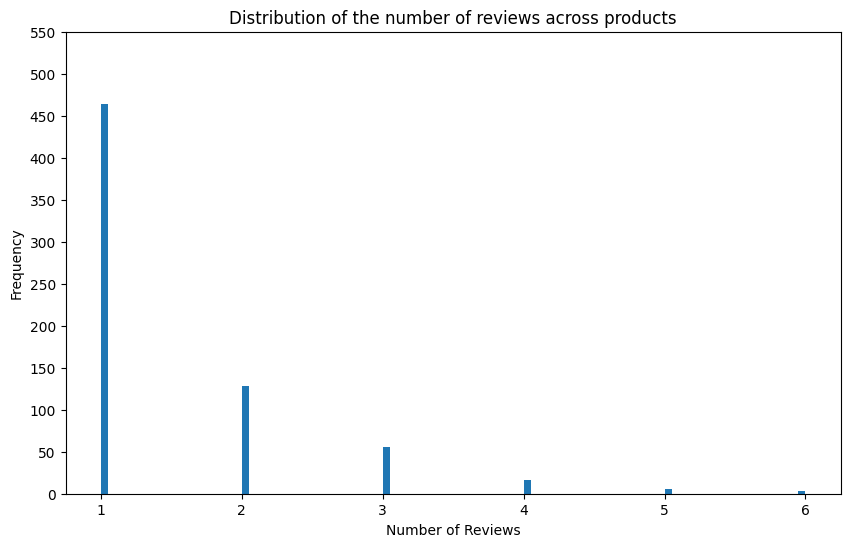

In [177]:
# Distribution of the number of reviews across products
plt.figure(figsize=(10,6))
plt.hist(df_select.groupby('asin')['reviewText'].count().sort_values(ascending=False), bins=100)
plt.title('Distribution of the number of reviews across products')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 600, 50))
plt.show()

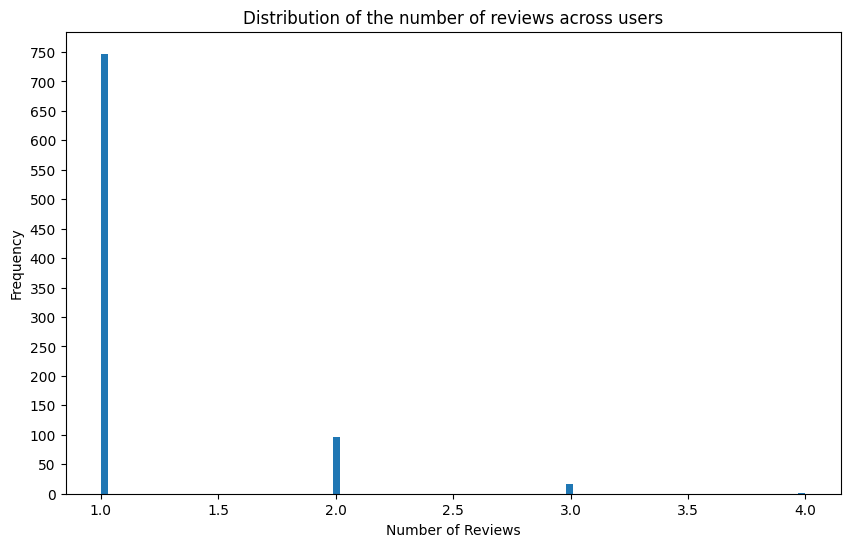

In [178]:
# Distribution of the number of reviews across users
plt.figure(figsize=(10,6))
plt.hist(df_select.groupby('reviewerID')['reviewText'].count().sort_values(ascending=False), bins=100)
plt.title('Distribution of the number of reviews across users')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 800, 50))
plt.show()

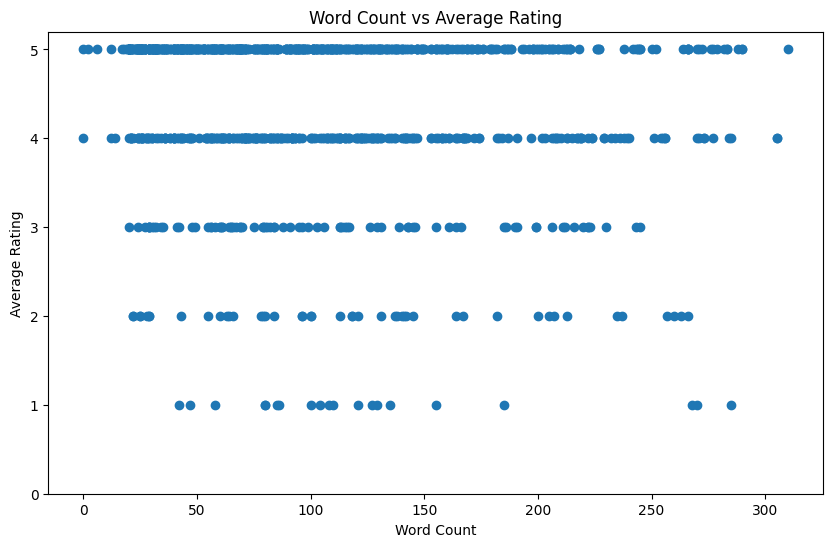

In [179]:
# plot word count vs rating
plt.figure(figsize=(10,6))
plt.scatter(df_select['word_count'], df_select['overall'])
plt.title('Word Count vs Average Rating')
plt.xlabel('Word Count')
plt.ylabel('Average Rating')
plt.yticks(np.arange(0, 6, 1))
plt.show()

In [180]:
#applying labels positive, negative and neutral
def label(x):
    if x["overall"]>=4:
        return "Positive"
    elif x["overall"]==3:
        return "Neutral"
    else:
        return "Negative"
df_select["label"]=df_select.apply(label, axis=1)

In [181]:
df_select.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewTextSummary,word_count,label
40641,A1ZGHA3IJV01BK,B006Y834NC,"K-cee Kit ""CAH-M""","[3, 4]",This is a really good printer...I should menti...,5.0,Great All in One printer...,1333065600,"03 30, 2012",Great All in One printer... This is a really g...,113,Positive
23848,AMLXY5B95T869,B002M835C8,J.C.,"[0, 0]",These things are stiff translucent pouches tha...,5.0,What a great idea,1254787200,"10 6, 2009",What a great idea These things are stiff trans...,169,Positive
18539,A3AZI828WJN1CD,B001PME0VM,"Becky in NOLA ""Becky""","[0, 0]",Enclosed in the package with the Swingline Opt...,4.0,Redesigned? Works great,1383609600,"11 5, 2013",Redesigned? Works great Enclosed in the packag...,256,Positive
43184,AONUCJBC85BL,B008ZDCZ8Y,KindlePad,"[1, 1]",This is a very good scanner. I previously used...,4.0,"Very good, lots of of options.. software on OS...",1358985600,"01 24, 2013","Very good, lots of of options.. software on OS...",206,Positive
21379,AHM8R6ATGRDTU,B002JFX02Y,Jenny,"[0, 0]",I teach in an atmosphere where the teachers be...,5.0,My Whiteboard are finally white.,1404172800,"07 1, 2014",My Whiteboard are finally white. I teach in an...,56,Positive


In [128]:
# text representation using word2vec
import gensim
from gensim.models import Word2Vec

# split the text into words
reviewTextSummary_list = df_select['reviewTextSummary'].str.split()

# train the model
model = Word2Vec(reviewTextSummary_list, min_count=1, size=50, workers=3, window=3)
 
# summarize the loaded model
print(model)

Word2Vec<vocab=14473, vector_size=100, alpha=0.025>


In [185]:
#save the model
model.save('model.bin')